In [18]:
import vtk
import imageio.v3 as iio
import numpy as np
#import cupy as cp
import os
import json

foldername = "well_behaved"



n_snapshot = 1

def load_data(foldername):
    print("reading .tiff files ...")
    tiff_files = sorted([f for f in os.listdir(foldername) if f.endswith(".tiff") or f.endswith(".tif")])
    images = []
    for file in tiff_files:
        image_path = os.path.join(foldername, file)
        img = iio.imread(image_path)
        images.append(img)
    image_stack = np.stack(images, axis=0)
    return image_stack
    return array

images = load_data(foldername)
img = images[0]


reading .tiff files ...


In [19]:
import cv2
import numpy as np


# Denoise
denoised = cv2.medianBlur(img, 3)

#DoG
g_small = cv2.GaussianBlur(denoised, (3, 3), 0)
g_large = cv2.GaussianBlur(denoised, (7, 7), 0)
dog = cv2.subtract(g_small, g_large)

# threshhold
thresh = cv2.adaptiveThreshold(
    dog.astype(np.uint8), 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    21, 2
)

# morph
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Connected-component analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(opened, connectivity=8)

min_size = 15
for label_idx in range(1, num_labels):  # label 0 is the background
    area = stats[label_idx, cv2.CC_STAT_AREA]
    if area < min_size:
        opened[labels == label_idx] = 0


num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(opened, connectivity=8)

# Show results


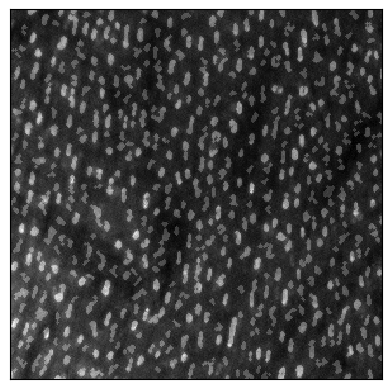

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



fig, ax = plt.subplots()

ax.imshow(2 * opened + 0.5 * img, cmap='gray', origin='upper', interpolation='nearest')


ax.set_xticks([])
ax.set_yticks([])


plt.show()